In [37]:
import os
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from tensorflow.keras.utils import plot_model



## Load Dataset

In [38]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

print("X Train: ", x_train.shape)
print("Y Train: ", y_train.shape)
print("X Test: ", x_test.shape)
print("Y Test: ", y_test.shape)

X Train:  (50000, 32, 32, 3)
Y Train:  (50000, 1)
X Test:  (10000, 32, 32, 3)
Y Test:  (10000, 1)


## Display Dataset Samples

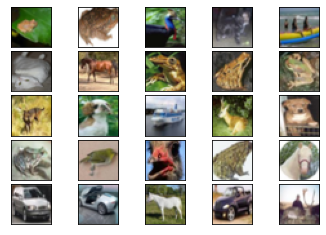

In [39]:
# display some random training images in a 25x25 grid
num_plot = 5
f, ax = plt.subplots(num_plot, num_plot)
for m in range(num_plot):
    for n in range(num_plot):
        idx = np.random.randint(0, x_train.shape[0])
        ax[m, n].imshow(x_train[idx])
        ax[m, n].get_xaxis().set_visible(False)
        ax[m, n].get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0.1)
f.subplots_adjust(wspace=0)
plt.show()

In [40]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [41]:
# Prep data save paths
save_dir = os.path.abspath('Models/')


In [42]:
from modules import CNNModel

# Model 1

In [43]:
m_id = 1
model = CNNModel(id=m_id)()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

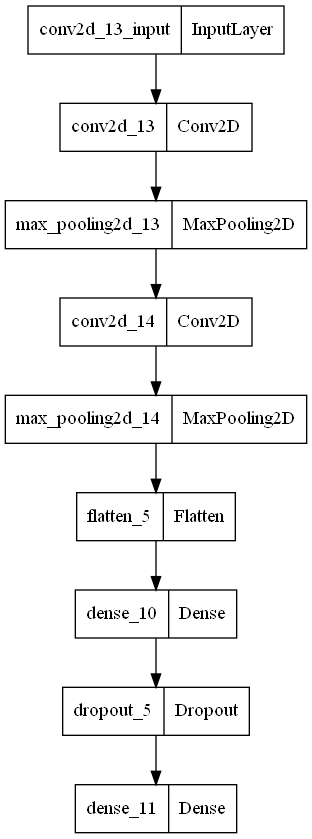

In [44]:
plot_model(model=model, to_file=os.path.join(save_dir, f'{m_id}/model.png'))

In [45]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=15, verbose=1)

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 3.2211 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/15
391/391 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/15
391/391 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/15
391/391 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/15
391/391 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 

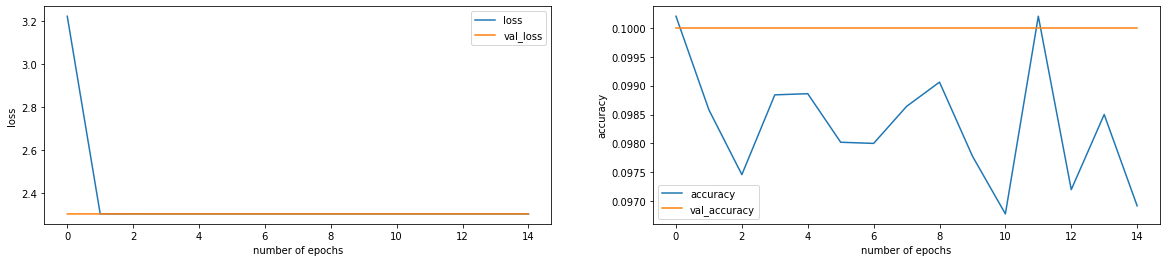

In [46]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(os.path.join(save_dir, f"{m_id}/training_history.png"))
plt.show()

In [47]:
pd.DataFrame(history.history).to_hdf(os.path.join(save_dir, f"{m_id}/history.h5"), 'history')
model.save(os.path.join(save_dir, f'{m_id}/model.h5'))
model.save_weights(os.path.join(save_dir, f'{m_id}/final_weights.hdf5'), overwrite=True)

In [48]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026063442230225, 0.10000000149011612]

## Model 2

In [49]:
m_id = 2
model = CNNModel(id=m_id)()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 3136)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

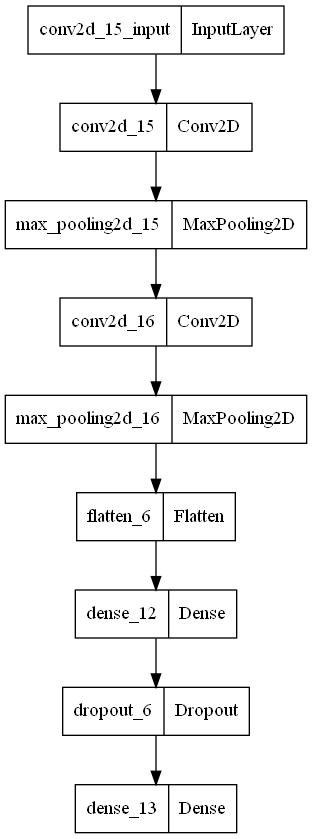

In [50]:
plot_model(model=model, to_file=os.path.join(save_dir, f'{m_id}/model.png'))

In [51]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=15, verbose=1)

Epoch 1/15
391/391 [==============================] - 3s 7ms/step - loss: 3.2338 - accuracy: 0.1160 - val_loss: 2.2613 - val_accuracy: 0.1373
Epoch 2/15
391/391 [==============================] - 3s 7ms/step - loss: 2.2509 - accuracy: 0.1360 - val_loss: 2.2023 - val_accuracy: 0.1635
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 2.1998 - accuracy: 0.1644 - val_loss: 2.0210 - val_accuracy: 0.2494
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 1.9888 - accuracy: 0.2482 - val_loss: 1.8103 - val_accuracy: 0.3406
Epoch 5/15
391/391 [==============================] - 3s 7ms/step - loss: 1.8465 - accuracy: 0.2948 - val_loss: 1.6554 - val_accuracy: 0.3779
Epoch 6/15
391/391 [==============================] - 3s 7ms/step - loss: 1.7699 - accuracy: 0.3242 - val_loss: 1.5173 - val_accuracy: 0.4300
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 1.6280 - accuracy: 0.3829 - val_loss: 1.3811 - val_accuracy: 0.4986
Epoch 

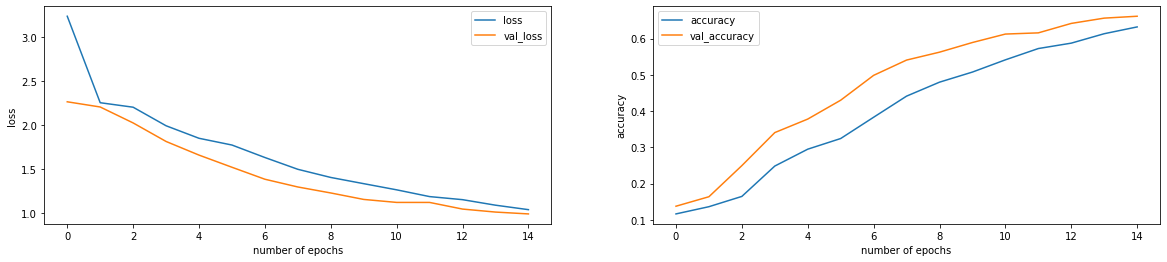

In [52]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(os.path.join(save_dir, f"{m_id}/training_history.png"))
plt.show()

In [53]:
pd.DataFrame(history.history).to_hdf(os.path.join(save_dir, f"{m_id}/history.h5"), 'history')
model.save(os.path.join(save_dir, f'{m_id}/model.h5'))
model.save_weights(os.path.join(save_dir, f'{m_id}/final_weights.hdf5'), overwrite=True)

In [54]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9868 - accuracy: 0.6618


[0.9868127107620239, 0.6618000268936157]

## Model 3

In [55]:
m_id = 3
model = CNNModel(id=m_id)()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 3, 3, 128)       

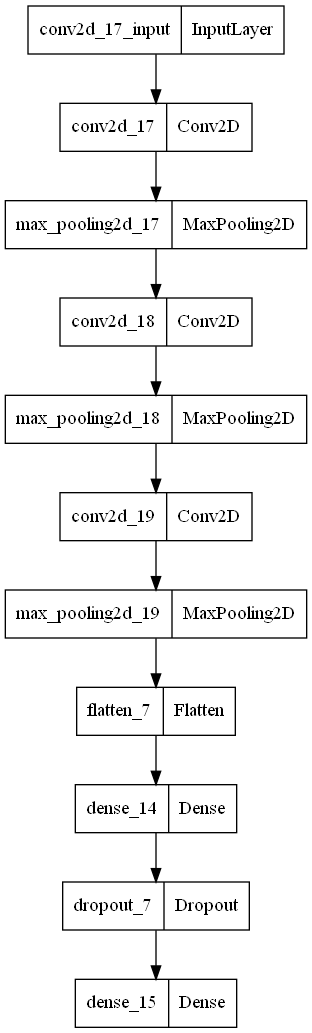

In [56]:
plot_model(model=model, to_file=os.path.join(save_dir, f'{m_id}/model.png'))

In [57]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=15, verbose=1)

Epoch 1/15
391/391 [==============================] - 4s 9ms/step - loss: 2.4554 - accuracy: 0.1374 - val_loss: 2.1201 - val_accuracy: 0.1883
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 2.0986 - accuracy: 0.1844 - val_loss: 2.0071 - val_accuracy: 0.2172
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 1.9000 - accuracy: 0.2506 - val_loss: 1.6183 - val_accuracy: 0.3912
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 1.5891 - accuracy: 0.4023 - val_loss: 1.3991 - val_accuracy: 0.4898
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 1.3889 - accuracy: 0.4914 - val_loss: 1.1762 - val_accuracy: 0.5750
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 1.2192 - accuracy: 0.5643 - val_loss: 1.0909 - val_accuracy: 0.6210
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 1.1107 - accuracy: 0.6073 - val_loss: 1.0209 - val_accuracy: 0.6400
Epoch 

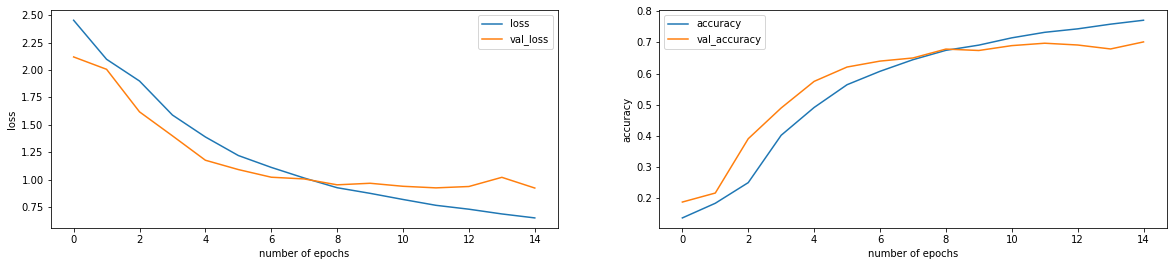

In [58]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(os.path.join(save_dir, f"{m_id}/training_history.png"))
plt.show()

In [59]:
pd.DataFrame(history.history).to_hdf(os.path.join(save_dir, f"{m_id}/history.h5"), 'history')
model.save(os.path.join(save_dir, f'{m_id}/model.h5'))
model.save_weights(os.path.join(save_dir, f'{m_id}/final_weights.hdf5'), overwrite=True)

In [60]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9221 - accuracy: 0.7015


[0.9220804572105408, 0.7014999985694885]

## Model 4

In [61]:
m_id = 4
model = CNNModel(id=m_id)()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 3, 3, 128)       

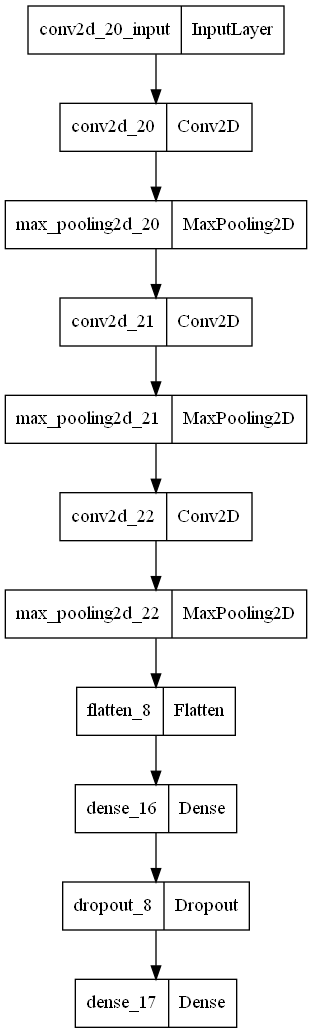

In [62]:
plot_model(model=model, to_file=os.path.join(save_dir, f'{m_id}/model.png'))

In [63]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=15, verbose=1)

Epoch 1/15
391/391 [==============================] - 4s 8ms/step - loss: 2.5571 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/15
391/391 [==============================] - 3s 8ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/15
391/391 [==============================] - 5s 12ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/15
391/391 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch

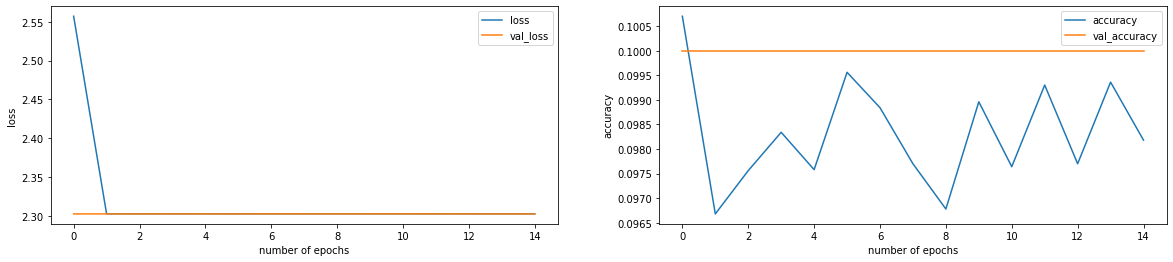

In [64]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(os.path.join(save_dir, f"{m_id}/training_history.png"))
plt.show()

In [65]:
pd.DataFrame(history.history).to_hdf(os.path.join(save_dir, f"{m_id}/history.h5"), 'history')
model.save(os.path.join(save_dir, f'{m_id}/model.h5'))
model.save_weights(os.path.join(save_dir, f'{m_id}/final_weights.hdf5'), overwrite=True)

In [66]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302589178085327, 0.10000000149011612]

## Model 5

In [67]:
m_id = 5
model = CNNModel(id=m_id)()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 3, 3, 128)       

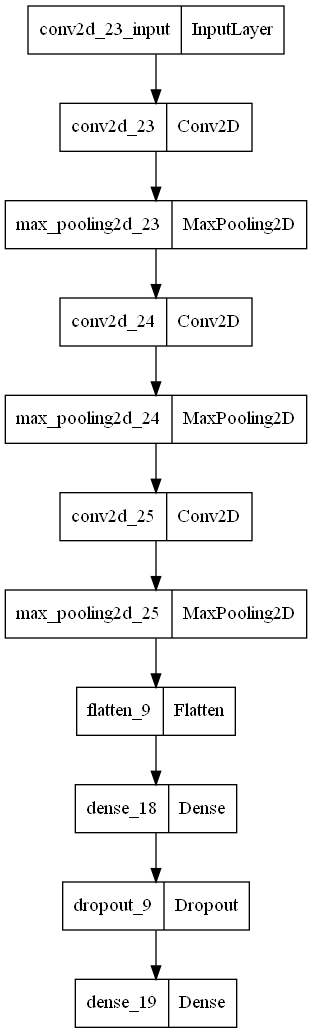

In [68]:
plot_model(model=model, to_file=os.path.join(save_dir, f'{m_id}/model.png'))

In [69]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=15, verbose=1)

Epoch 1/15
391/391 [==============================] - 3s 8ms/step - loss: 2.5295 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/15
391/391 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/15
391/391 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/15
391/391 [==============================] - 3s 8ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/15
391/391 [==============================] - 3s 8ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.0998
Epoch 7/15
391/391 [==============================] - 3s 8ms/step - loss: 2.3027 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 

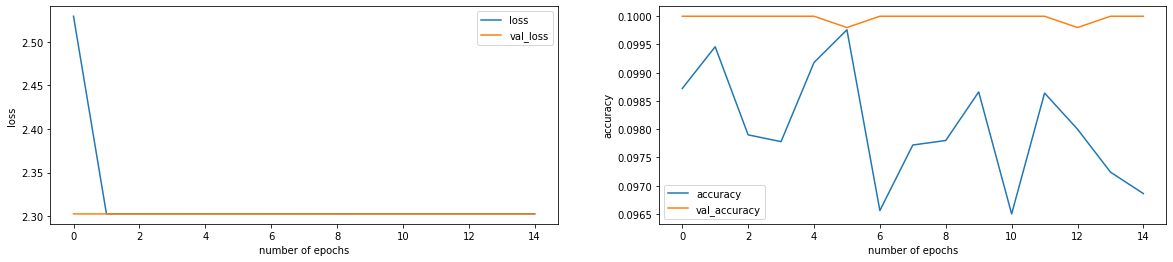

In [70]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(os.path.join(save_dir, f"{m_id}/training_history.png"))
plt.show()

In [71]:
pd.DataFrame(history.history).to_hdf(os.path.join(save_dir, f"{m_id}/history.h5"), 'history')
model.save(os.path.join(save_dir, f'{m_id}/model.h5'))
model.save_weights(os.path.join(save_dir, f'{m_id}/final_weights.hdf5'), overwrite=True)

In [72]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302595615386963, 0.10000000149011612]